In [15]:
#Load libraries:
import pandas as pd
import matplotlib.pyplot as plt

#########################################
#Load Scientometrics Data:
scien_yd = pd.read_csv("/home/jovyan/query-results/f83f5e62-e8ef-408e-ad0b-33e4a66c9af6.csv", sep=',', header = 0)
print(scien_yd)

        paper_id  year                                     original_title  \
0     2294649429  2003  Development of a High Count Rate Readout Syste...   
1     2765976477  2017  The hot spot transformation in the research ev...   
2     2081133965  1987  In search of influence: The testing of the Ort...   
3     2125355603  1994                         Puberty or mid-life crisis   
4     2045322537  1980       Science and science policy in the Arab world   
...          ...   ...                                                ...   
6847  2463876690  2016  On the use of databases about research perform...   
6848  1994033734  2004  The motivation for citing specific references ...   
6849  1987685882  1989  JOURNAL-TO-JOURNAL CITATION DATA: ISSUES OF VA...   
6850  2765846130  2018  And now for something completely different: th...   
6851  2163794107  2009  Using the h-index for assessing single publica...   

                                   authors_display_name  \
0     Emmanuel Z

In [17]:
#Merge datasets and print:

scien_yd2 = scien_yd[scien_yd.journal_display_name == 'Scientometrics']
j_of_inf_yd2 = scien_yd[scien_yd.journal_display_name == 'Journal of Informetrics']

scien_yd2 = scien_yd[['paper_id', 'year']]
j_of_inf_yd2 = j_of_inf_yd2[['paper_id', 'year']]

scien_yd = scien_yd2.groupby(['year']).count()
j_of_inf_yd = j_of_inf_yd2.groupby(['year']).count()

yd = scien_yd.merge(j_of_inf_yd, left_on='year', right_on='year', how = 'outer')

yd.reset_index(inplace=True)

yd = yd.sort_values('year')

yd.columns = ['year', 'Scientometrics', 'Journal of Informetrics']

yd = yd.fillna(0)
print(yd)

    year  Scientometrics  Journal of Informetrics
0   1976               1                      1.0
1   1978               6                      0.0
2   1979              21                      0.0
3   1980              37                      2.0
4   1981              30                      0.0
5   1982              29                      1.0
6   1983              24                      0.0
7   1984              32                      0.0
8   1985              57                      0.0
9   1986              46                      0.0
10  1987              68                      1.0
11  1988              56                      0.0
12  1989              79                      0.0
13  1990              67                      0.0
14  1991              83                      0.0
15  1992              90                      1.0
16  1993              66                      1.0
17  1994              93                      1.0
18  1995              90                      0.0


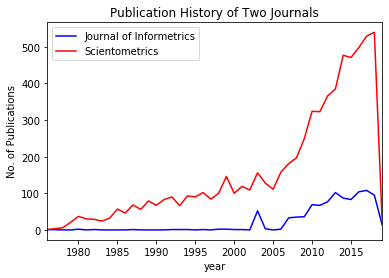

In [19]:
#Create plot:
yd.plot(x='year', y=['Journal of Informetrics', 'Scientometrics'], color=['blue', 'red'], kind='line')
plt.legend(loc = 2)
plt.ylabel(ylabel='No. of Publications')
plt.title(label = 'Publication History of Two Journals')
plt.show()